# Visualize Integration Steps 

In [ ]:
!pip install --quiet scvi-colab
!pip install --quiet scib-metrics
from scvi_colab import install

install(run_outside_colab=True)

In [20]:
import scanpy as sc
import scvi
from rich import print
from scib_metrics.benchmark import Benchmarker
from scvi.model.utils import mde
from scvi_colab import install
import tqdm as notebook_tqdm
import pandas as pd
from IPython.display import SVG, display

In [2]:
sc.set_figure_params(figsize=(4, 4))

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [3]:
adata = sc.read("/home/h/hollenberg/MaPra/merged_data.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 93103 × 32317
    obs: 'author_annotation', 'scDblFinder_score', 'scDblFinder_class', 'manual_celltype_annotation', 'batch', 'condition', 'doublet_score', 'predicted_doublet', 'timepoint', 'author_annotation_coarse', 'dataset', 'fibrotic/control', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'low_hierarchy', 'high_hierarchy'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dataset_colors', 'hvg', 'log1p', 'manual_celltype_annotation_colors', 'neighbors', 'pca', 'umap

## Load SCVI Model

In [5]:
vae = scvi.model.SCVI.load("/home/h/hollenberg/MaPra/scvi_model/", adata)

INFO     File /home/h/hollenberg/MaPra/scvi_model/model.pt already downloaded                                      


/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/h/hollenberg/miniconda3/envs/scanpy/lib/python ...
  rank_zero_warn(
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[raw_counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [7]:
adata.obsm["X_scVI"] = vae.get_latent_representation()
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
adata.obsm["X_mde"] = mde(adata.obsm["X_scVI"])

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/si

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


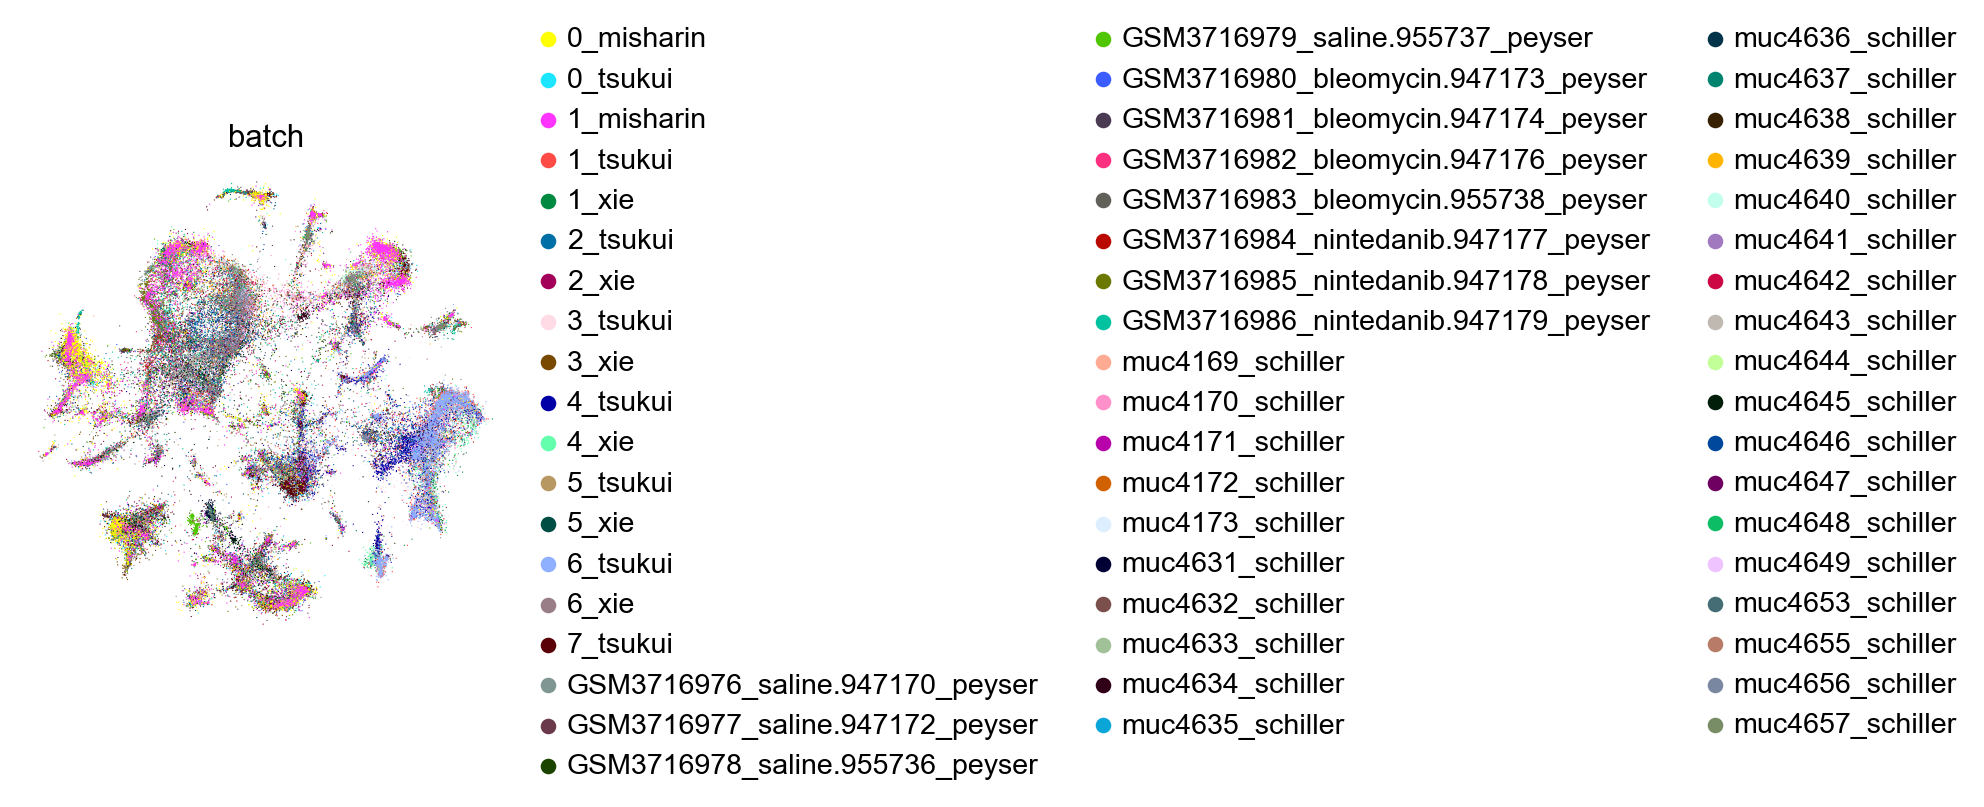

In [9]:
# visualize embedding
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["batch"],
    frameon=False,
    ncols=1,
)
# TODO hamonize batch labels

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


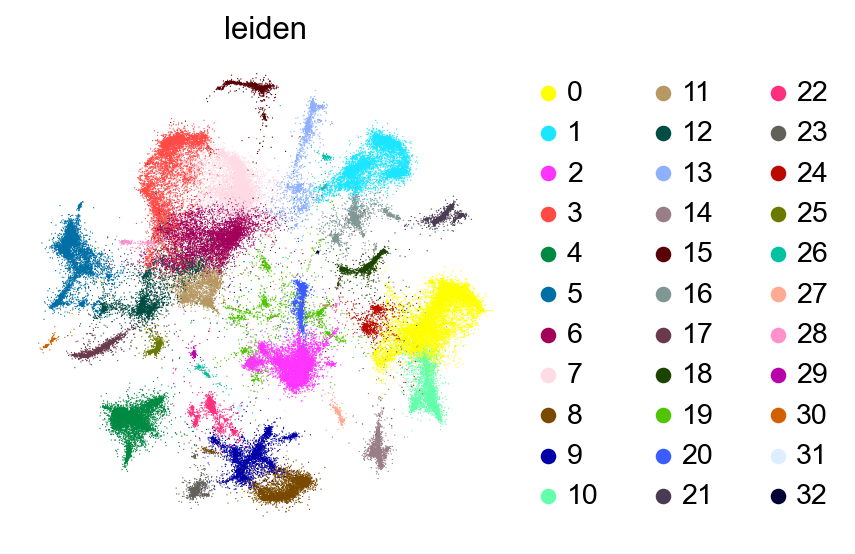

In [10]:
# visualize embedding
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["leiden"],
    frameon=False,
    ncols=1,
)

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


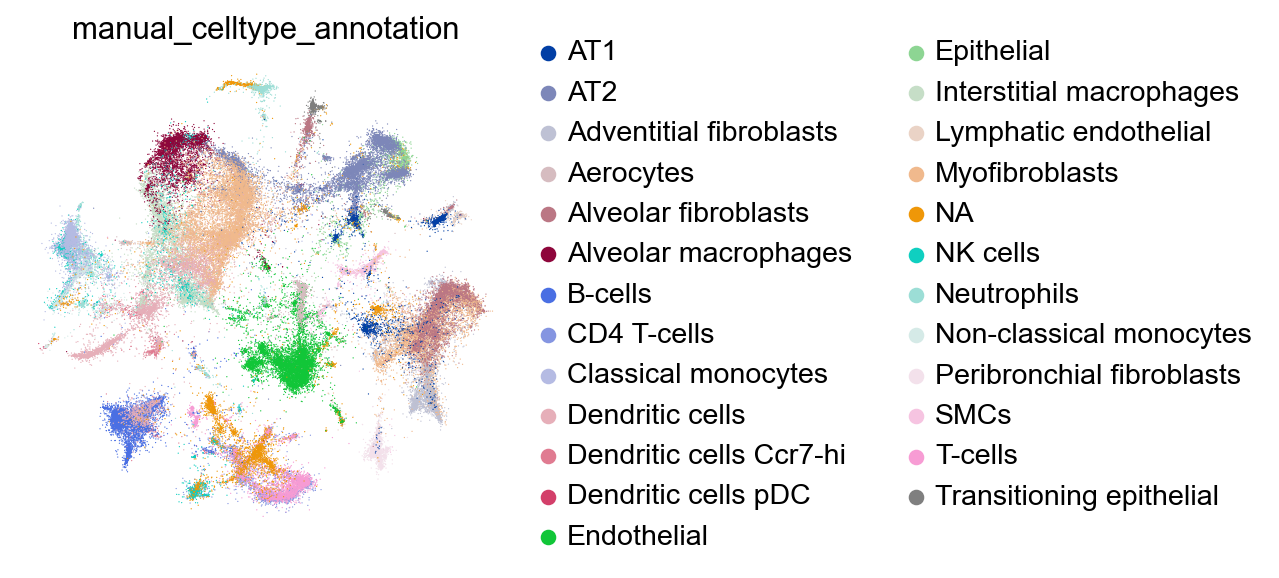

In [11]:
# visualize embedding
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["manual_celltype_annotation"],
    frameon=False,
    ncols=1,
)

## Load SCANVI Model

In [15]:
lvae = scvi.model.SCANVI.load("/home/h/hollenberg/MaPra/scanvi_model/", adata)

INFO     File /home/h/hollenberg/MaPra/scanvi_model/model.pt already downloaded                                    


/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/h/hollenberg/miniconda3/envs/scanpy/lib/python ...
  rank_zero_warn(
/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[raw_counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [16]:
adata.obsm["X_scANVI"] = lvae.get_latent_representation(adata)
adata.obsm["X_mde_scanvi"] = mde(adata.obsm["X_scANVI"])

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


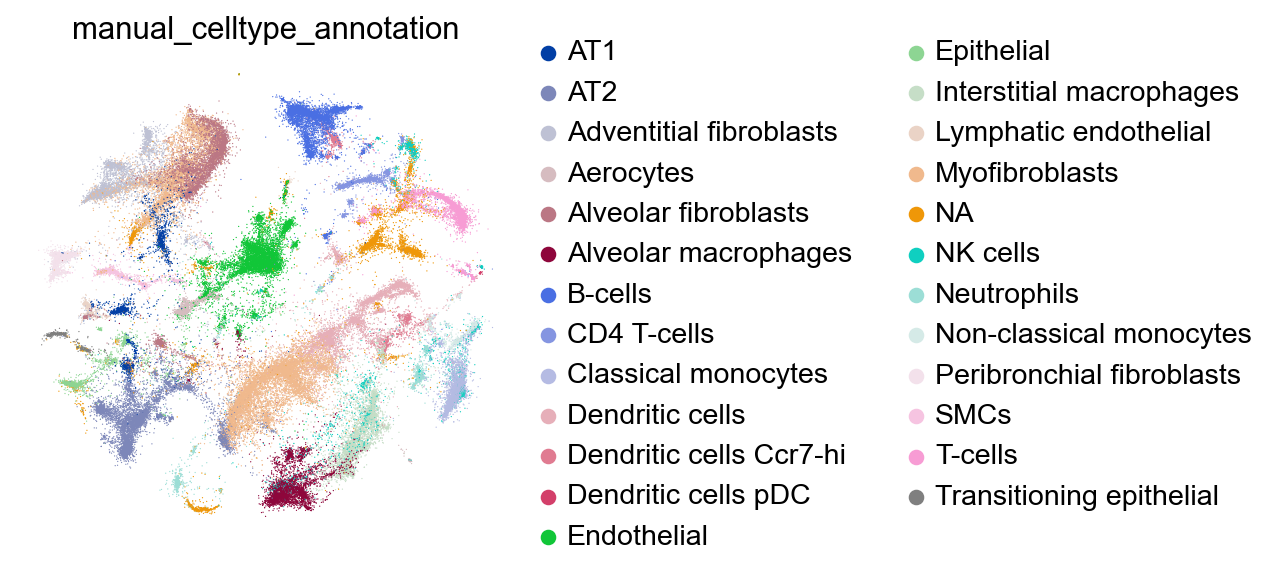

In [17]:
# visualize embedding
sc.pl.embedding(
    adata, basis="X_mde_scanvi", color=["manual_celltype_annotation"], ncols=1, frameon=False
)

## Visualize integration metrics

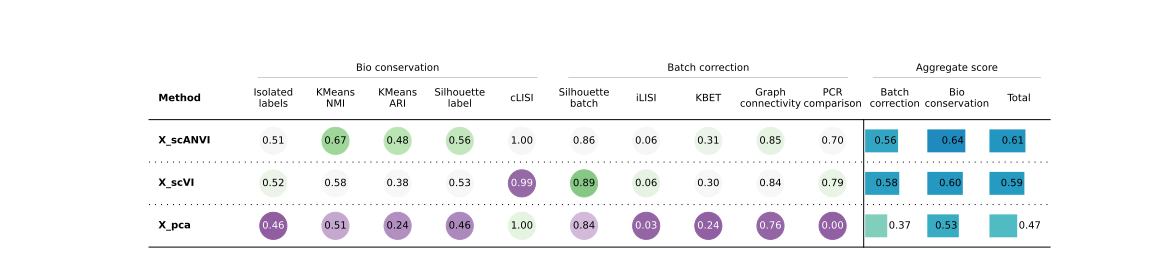

In [21]:
display(SVG(filename='/home/h/hollenberg/MaPra/benchmark_results/scib_results.svg'))

In [30]:
metric = pd.read_csv('/home/h/hollenberg/MaPra/benchmark_results/results.csv')

In [34]:
metric.iloc[0:3] = metric.iloc[0:3].apply(pd.to_numeric, errors='coerce')
rounded_data = metric.round(1)
print(rounded_data)

Isolated labels        KMeans NMI        KMeans ARI  Silhouette label  \
0          0.455682          0.505406          0.238187          0.463782   
1          0.517045          0.582236          0.381924           0.52823   
2          0.510577          0.665076          0.476091          0.564023   
3  Bio conservation  Bio conservation  Bio conservation  Bio conservation   

              cLISI  Silhouette batch             iLISI              KBET  \
0          0.999941          0.844517          0.025156          0.237384   
1          0.990069          0.885111          0.061043          0.303269   
2          0.998322          0.860431          0.055445          0.311755   
3  Bio conservation  Batch correction  Batch correction  Batch correction   

  Graph connectivity    PCR comparison Batch correction Bio conservation  \
0           0.757899               0.0         0.372991           0.5326   
1             0.8386          0.794281         0.576461         0.599901   
2           0.853599          0.699022          0.55605         0.642818   
3   Batch correction  Batch correction  Aggregate score  Aggregate score   

             Total  
0         0.468756  
1         0.590525  
2         0.608111  
3  Aggregate score